In [1]:
import torch
from torch.autograd import Variable
from tqdm import tqdm, trange

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns


np.random.seed(42)
from pathlib import Path


In [2]:
plt.rcParams["figure.figsize"] = (20,10)
sns.set_context("poster")
sns.set_style("ticks")

In [3]:
N = 100

In [4]:
from data.data_generators import generate_data


In [5]:
X,y,X_long,y_long = generate_data(N,0.3)

In [6]:
from models.models import SaverModel

In [7]:
model = SaverModel()

In [8]:
epochs = 10000

In [9]:
%%time


for i in trange(epochs):

    model.fit_model(X,y)

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:16<00:00, 593.08it/s]


Wall time: 16.9 s


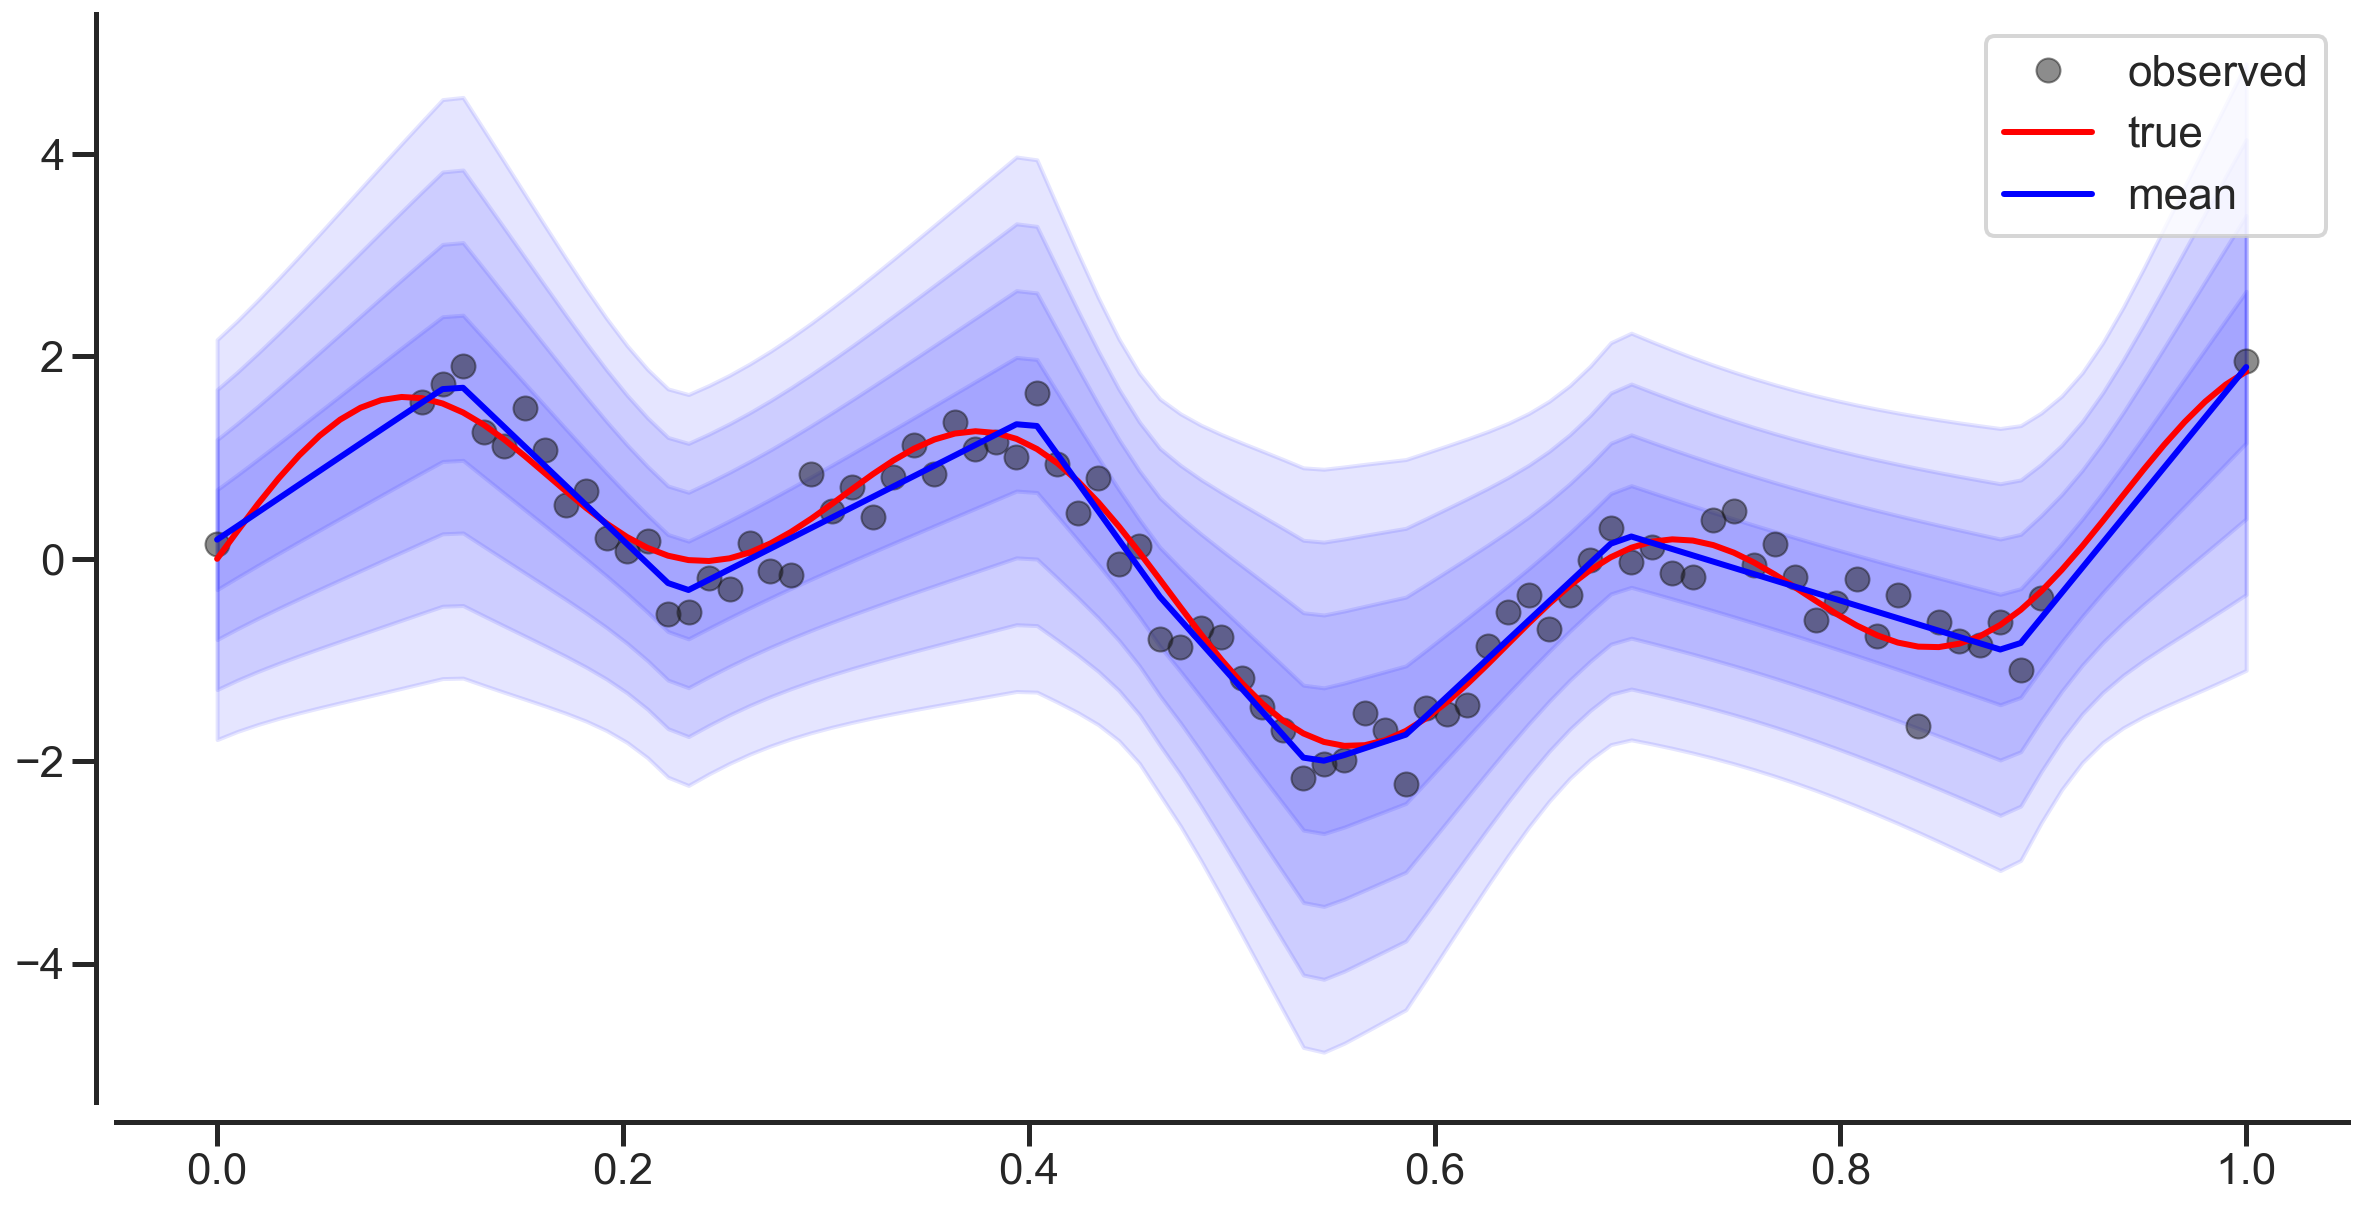

In [10]:
iters = 100
l2 = 1
n_std = 4


fig, ax = plt.subplots(1,1)
y_mean, y_std = model.uncertainty_function(X_long, iters, l2=l2)


ax.plot(X, y, ls="none", marker="o", color="0.1", alpha=0.5, label="observed")
ax.plot(X_long, y_long, ls="-", color="r", label="true")
ax.plot(X_long, y_mean, ls="-", color="b", label="mean")

for i in range(n_std):
    ax.fill_between(
        X_long.squeeze(),
        y_mean.squeeze() - y_std.squeeze() * ((i+1)/2),
        y_mean.squeeze() + y_std.squeeze() * ((i+1)/2),
        color="b",
        alpha=0.1
    )
    
    
    

ax.legend()
sns.despine(offset=10)